In [1]:
import os
import sys
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42  # TrueType fonts instead of Type 3 fonts
mpl.rcParams['axes.unicode_minus'] = False  # Ensures minus signs render properly

In [2]:
output_dir = '../result/validation/se_related_3_fix/CRC'
filepath = os.path.join(output_dir, 'se_summary.tsv')
df = pd.read_csv(filepath, sep='\t', header=0, index_col=0)
df = df.sort_values(by='rand', ascending=False)


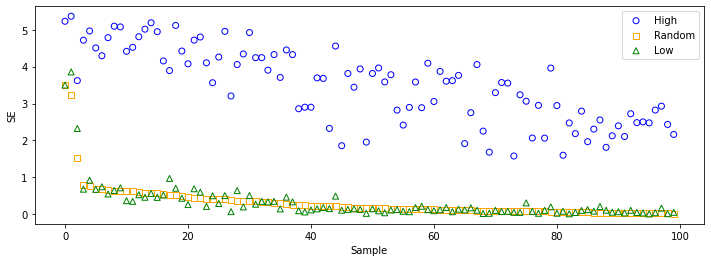

In [3]:
nsample = df.shape[0]
x = range(nsample)
plt.figure(figsize=(12, 4))
plt.scatter(x, df['high'], color='blue', marker='o', facecolors='none')
plt.scatter(x, df['rand'], color='orange', marker='s', facecolors='none')
plt.scatter(x, df['low'], color='green', marker='^', facecolors='none')
plt.ylabel('SE')
plt.xlabel('Sample')
plt.legend(['High', 'Random', 'Low'])
plt.savefig(os.path.join(output_dir, 'se_summary_scatter.pdf'), format='pdf')
plt.show()

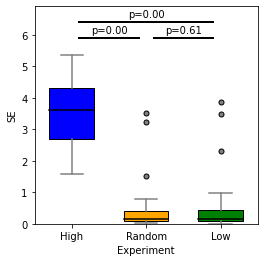

In [4]:
# 创建图像
fig, ax = plt.subplots(figsize=(4, 4))

# 绘制 boxplot
bp = ax.boxplot([df['high'], df['rand'], df['low']], labels=['High', 'Random', 'Low'], patch_artist=True, widths=0.6)
colors = ['blue', 'orange', 'green']
max_y = max([max(df['high']), max(df['rand']), max(df['low'])])*1.1

# 添加 p 值
p12 = 3.8965598450959084e-18
p13 = 3.8965598450959084e-18
p23 = 0.6132542176643868

for box, color in zip(bp['boxes'], colors):
    box.set(facecolor=color, alpha=1)

for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=1.5)
for cap in bp['caps']:
    cap.set(color='gray', linewidth=1.5)
for median in bp['medians']:
    median.set(color='black', linewidth=1.5)
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='gray', markersize=5)

ax.plot([1.1, 1.9], [max_y]*2, '-', color='black', linewidth=2)
ax.text(1.5, max_y + 0.1, f"p={p12:.2f}", ha='center', va='bottom')

ax.plot([2.1, 2.9], [max_y]*2, '-', color='black', linewidth=2)
ax.text(2.5, max_y + 0.1, f"p={p23:.2f}", ha='center', va='bottom')

ax.plot([1.1, 2.9], [max_y+0.5]*2, '-', color='black', linewidth=2)
ax.text(2, max_y + 0.6, f"p={p13:.2f}", ha='center', va='bottom')

# 设置标题和轴标签
#ax.set_title('SE comparison in different experiment')
ax.set_xlabel('Experiment')
ax.set_ylabel('SE')
ax.set_ylim(0, max_y+1)

# 显示图像
plt.savefig(os.path.join(output_dir, 'se_summary_boxplot.pdf'), format='pdf')
plt.show()